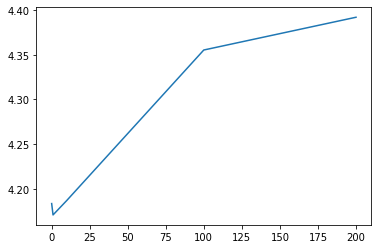

In [92]:
# import Sklearn packages
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 

# import helper packages
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
from numpy import sqrt

# Our constants
lambdas = [0.1,1,10,100,200]
folds = 10

# Read and split data
df = pd.read_csv("train.csv")
kf = KFold(n_splits=folds)

# Initialize root mean squared list (over lambdas)
main_rmses = []

# Iterate over lambdas
for lam in lambdas:
    # Initialize root mean squared list (over folds)
    sub_rmses = []
    # Iterate over folds
    for train_index, test_index in kf.split(df):
        X_train, X_test = df.iloc[train_index,1:], df.iloc[test_index,1:]
        y_train, y_test = df.iloc[train_index,0], df.iloc[test_index,0]
        
        # Fit and predict Ridge regression
        clf = Ridge(alpha=lam).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        sub_rmses.append(sqrt(mean_squared_error(y_test, y_pred)))
    main_rmses.append(mean(sub_rmses))

# Plot mean root meaned errors over lambda
plt.plot(lambdas,main_rmses)
plt.show()

# Export results to output.csv
df_export = pd.DataFrame(main_rmses)
df_export.to_csv('output.csv', index=False, header=False)  
